# Real-world Data Wrangling

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data



In [140]:
!pip install kagglehub



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [141]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt


### **1.1.** Problem Statement
For this project, I will be analyzing datasets that contain information about store promotions and pricing to answer two key questions. The first question explores which items (item_id) are discounted most frequently, and in which stores (store_id.



#### 1- : Which items (item_id) are discounted most frequently, and in which stores (store_id)?
#### 2- : top 10 highest-priced items?


### **1.2.** Gather at least two datasets using two different data gathering methods

In this project, I have decided to gather the datasets using the manual as well as programatic download methods through Kagglehup.



#### **Dataset 1**

Type: *CSV file* 

File name : *price_history*

Method: *Kagglehub* https://www.kaggle.com/datasets/svizor/retail-sales-forecasting-data?select=price_history.csv

Dataset variables:
 - date: The date when the price data was recorded.
 - item_id: The unique identifier for the items.
 - sale_price_before_promo: The price of the item before any promotional discounts were applied.
 - sale_price_time_promo: The price of the item during the promotional period.
 - promo_type_code: The code identifying the type of promotion applied to the item.
 - doc_id: The unique identifier for the document (e.g., promotion record).
 - number_disc_day: The number of days the item was on promotion.
 - store_id: The unique identifier for the store.


In [142]:
path = kagglehub.dataset_download("svizor/retail-sales-forecasting-data")
df_price = pd.read_csv(path + "/price_history.csv")
df_price.head()

,Unnamed: 0,date,item_id,price,code,store_id
0,0,2023-08-01,4a1f95fe4d4b,499.9,1,1
1,1,2023-08-01,bf43a9d3ae13,0.0,9999999999,1
2,2,2023-08-01,0dd8744decce,129.9,1,1
3,3,2023-08-01,9b38c7e4dba9,136.0,1,1
4,4,2023-08-01,b791e8c9347c,0.0,1,1


#### Dataset 2

Type: *CSV file* 

File name: discount_history
 
Method: *manual Dwonload* the data gathered manual from https://www.kaggle.com/datasets/svizor/retail-sales-forecasting-data?resource=download&select=discounts_history.csv

Dataset variables:

 - date: The date when the price data was recorded.
 - item_id: The unique identifier for the item.
 - sale_price_before_promo: The price of the item before any promotional discount.
 - sale_price_time_promo: The price of the item during the promotional period.
 - promo_type_code: The code for the type of promotion applied to the item.
 - doc_id: The unique identifier for the promotional document (such as a promotion record).
 - number_disc_day: The number of days the item was on promotion.
 - store_id: The unique identifier for the store.

In [143]:
df_discount = pd.read_csv("discounts_history.csv")
df_discount.head()

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
0,3648316,2022-08-28,cde97a9ec3ef,729.9,669.9,6.0,89ea9f0c-1c08-11ed-ad4d-005056861040,13.0,1
1,3648317,2022-08-28,2906fbc9e11c,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2,3648318,2022-08-28,c48c3a3d8c01,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
3,3648319,2022-08-28,f85243ca61e6,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
4,3648320,2022-08-28,27ce75534065,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1


In [144]:
# Save the raw data to a CSV file
df_price.to_csv('df_price_raw.csv', index=False)
df_discount.to_csv('df_discount_raw.csv', index=False)

## 2. Assess data



### Completeness :

In [145]:
df_price.head()

,Unnamed: 0,date,item_id,price,code,store_id
0,0,2023-08-01,4a1f95fe4d4b,499.9,1,1
1,1,2023-08-01,bf43a9d3ae13,0.0,9999999999,1
2,2,2023-08-01,0dd8744decce,129.9,1,1
3,3,2023-08-01,9b38c7e4dba9,136.0,1,1
4,4,2023-08-01,b791e8c9347c,0.0,1,1


In [146]:
df_price.tail()

,Unnamed: 0,date,item_id,price,code,store_id
698621,1885028,2024-09-26,7586d4f4599e,479.9,10,4
698622,1885029,2024-09-26,4b7ea164af56,359.9,31,4
698623,1885030,2024-09-26,c1b874b62220,359.9,10,4
698624,1885031,2024-09-26,c1b874b62220,279.9,29,4
698625,1885032,2024-09-26,66dcdf3628de,99.9,10,4


In [147]:
df_price.sample(10)

,Unnamed: 0,date,item_id,price,code,store_id
697459,1883866,2024-09-25,b1db3fa1a974,199.9,9,4
35379,35379,2023-10-18,a2d871968596,63.9,12,1
504347,1607362,2023-08-30,4bfdba2fc912,1299.9,26,3
668835,1855242,2024-07-08,407b002c3c29,152.9,12,4
552918,1655933,2024-08-11,e432c7120c33,0.0,9999999999,3
580317,1766724,2023-05-06,3ac0b1c18f46,49.9,13,3
557429,1660444,2024-09-24,a3c5d4516606,99.9,1,3
23887,23887,2023-09-26,8c0ddd5e2074,0.0,1,1
517424,1620439,2023-11-17,4586b9f99126,23.9,7,3
572482,1758889,2023-02-03,f12a2c8085d2,64.9,1,3


In [148]:
df_discount.head()

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
0,3648316,2022-08-28,cde97a9ec3ef,729.9,669.9,6.0,89ea9f0c-1c08-11ed-ad4d-005056861040,13.0,1
1,3648317,2022-08-28,2906fbc9e11c,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
2,3648318,2022-08-28,c48c3a3d8c01,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
3,3648319,2022-08-28,f85243ca61e6,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1
4,3648320,2022-08-28,27ce75534065,129.9,99.9,NaN,039e85df-1e51-11ed-ad4d-005056861040,11.0,1


In [149]:
df_discount.tail()

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
3746739,11420928,2045-12-31,23b18d1f7da9,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,8766.0,4
3746740,11420929,2045-12-31,e5b2b6f57ea7,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,8766.0,4
3746741,11420930,2045-12-31,2c007023f650,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,8766.0,4
3746742,11420931,2045-12-31,9f716dce9a57,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,8766.0,4
3746743,11420932,2045-12-31,99d388c37359,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,8766.0,4


In [150]:
df_discount.sample(10)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
2323919,7972761,2024-05-13,8c700aaab569,139.9,109.9,5.0,89aa7941-0b82-11ef-bb94-005056afbcf1,7.0,2
2450062,8098904,2024-09-07,2ed442e5d3a9,129.9,103.9,6.0,0cb2caac-644e-11ef-bb94-005056afbcf1,10.0,2
972128,4620444,2023-10-19,f85712f9ba82,1399.9,999.9,5.0,5c1a71c5-68d3-11ee-bb94-005056afbcf1,8.0,1
1665378,5313694,2024-09-25,0b31a265d43e,529.9,499.9,5.0,45e0c4c5-7b0f-11ef-bb95-005056afbcf1,1.0,1
2838352,10505755,2024-03-24,484f531afe97,384.9,199.9,5.0,9fa8a227-e10f-11ee-bb94-005056afbcf1,12.0,3
2878125,10545528,2024-05-14,055c740a4c62,479.9,399.9,6.0,da9d2965-0bc4-11ef-bb94-005056afbcf1,8.0,3
2284012,7932854,2024-04-06,56a85ccaad0e,209.9,209.9,5.0,874871ac-ec2c-11ee-bb94-005056afbcf1,10.0,2
2732255,10399658,2023-10-10,dd9d652825c8,129.9,129.9,5.0,2ce2f748-5d46-11ee-bb94-005056afbcf1,13.0,3
3527820,11202009,2024-07-20,02feb2cf88b5,119.9,119.9,5.0,f3ed398f-4465-11ef-bb94-005056afbcf1,3.0,4
2918641,10586044,2024-07-03,3c723caca8df,74.9,54.9,6.0,2a72b99b-2e6c-11ef-bb94-005056afbcf1,14.0,3


In [151]:
df_price.isnull().sum()

Unnamed: 0    0
date          0
item_id       0
price         0
code          0
store_id      0
dtype: int64

In [152]:
df_discount.isnull().sum()

Unnamed: 0                      0
date                            0
item_id                         0
sale_price_before_promo         0
sale_price_time_promo           0
promo_type_code            317846
doc_id                          0
number_disc_day                 0
store_id                        0
dtype: int64

### Completeness Summary

* We found 317846 null values in promo_type_code column in the discount_history data set 

### Validity:

In [153]:
df_price.sample(5)

,Unnamed: 0,date,item_id,price,code,store_id
564106,1750513,2022-11-07,13939303b8d6,69.9,1,3
167179,167179,2024-09-24,2bf5a78f21d9,709.9,10,1
489051,1455808,2023-07-19,4d83137d656a,349.0,1,2
151572,151572,2024-08-11,545bce1dd6d3,278.9,7,1
2814,2814,2023-08-03,faf30cade649,0.0,1,1


In [154]:
df_discount.sample(5)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
3088633,10762822,2023-12-16,e2849c4e84ed,199.9,169.9,6.0,e26fccca-934e-11ee-bb94-005056afbcf1,10.0,4
2468322,8117164,2024-09-24,1b66559875e1,139.9,139.9,6.0,1e419593-7068-11ef-bb94-005056afbcf1,13.0,2
132714,3781030,2022-10-29,ad9f4fbd5e95,349.9,269.9,6.0,130b1a16-5559-11ed-bb91-005056afbcf1,3.0,1
1796289,7445131,2022-10-14,8c6557f8a766,69.9,59.9,6.0,acfdae10-4a36-11ed-ad4d-005056861040,2.0,2
1973201,7622043,2023-04-23,5a648d858c93,1399.9,1099.9,5.0,1bfe08c8-d7bb-11ed-bb93-005056afbcf1,13.0,2


In [155]:
df_price.dtypes

Unnamed: 0      int64
date           object
item_id        object
price         float64
code            int64
store_id        int64
dtype: object

In [156]:
df_discount.dtypes

Unnamed: 0                   int64
date                        object
item_id                     object
sale_price_before_promo    float64
sale_price_time_promo      float64
promo_type_code            float64
doc_id                      object
number_disc_day            float64
store_id                     int64
dtype: object

### validity summary
 - We found inconsistent data types in the date column, which is stored as an object instead of a datetime type, affecting date-based operations and analysis.







### Duplicates:

In [157]:
df_discount.sample(10)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
1021671,4669987,2023-11-25,17db969af01e,159.9,159.9,5.0,51fe30e4-8944-11ee-bb94-005056afbcf1,3.0,1
2622297,10289700,2023-02-06,b42301424cda,58.9,41.9,NaN,c409773c-a2a2-11ed-bb93-005056afbcf1,5.0,3
3380200,11054389,2024-05-11,1749a901cf31,129.9,129.9,5.0,1e5c9f10-0b7d-11ef-bb94-005056afbcf1,6.0,4
2439604,8088446,2024-08-29,7d0484487365,109.9,109.9,5.0,8e57a642-6505-11ef-bb94-005056afbcf1,2.0,2
766085,4414401,2023-07-06,15e14433099e,32.9,22.9,6.0,9e905c9e-1b51-11ee-bb93-005056afbcf1,1.0,1
1847614,7496456,2022-12-15,178e2e57ca04,199.9,99.9,5.0,d6e4c867-7651-11ed-bb93-005056afbcf1,3.0,2
1405156,5053472,2024-06-01,cbd4e396f52f,69.9,59.9,6.0,6e1932d3-175d-11ef-bb94-005056afbcf1,10.0,1
2472217,8121059,2024-09-28,fb19bf9db041,490.0,319.9,5.0,2444d80c-604e-11ef-bb94-005056afbcf1,38.0,2
2959873,10627276,2024-08-27,53a01aa38e9b,0.0,199.9,5.0,1107b99e-5ad5-11ef-bb94-005056afbcf1,13.0,3
3722249,11396438,2034-10-28,2c007023f650,59.9,59.9,NaN,baa3d490-5529-11ed-bb91-005056afbcf1,4684.0,4


In [158]:
df_price.sample(10)

,Unnamed: 0,date,item_id,price,code,store_id
317682,791659,2023-07-24,2040c15d35b9,29.9,7,1
546915,1649930,2024-06-17,1ceadc84aac9,0.0,7,3
163191,163191,2024-09-11,cde2a453130b,439.9,35,1
598666,1785073,2024-01-08,fc29adcfdf7e,1099.9,9,4
100699,100699,2024-03-24,260ee497efc6,67.9,12,1
412058,1124294,2024-08-08,a80d3c70c72c,139.9,1,2
108735,108735,2024-04-12,5353764779a6,39.9,1,1
251517,725494,2023-03-02,aaf169da967f,325.0,10,1
512592,1615607,2023-10-23,91ff901d6b9e,0.0,9999999999,3
110951,110951,2024-04-22,1b0b5f9cfd0e,269.9,35,1


In [159]:
df_price.duplicated().sum()

0

In [160]:
df_discount.duplicated().sum()

0

### Uniqueness Summary

* We found no duplications.

## Tideness

### Each variable forms a column:

In [161]:
df_price.sample(5)

,Unnamed: 0,date,item_id,price,code,store_id
27554,27554,2023-10-03,574a0ce6f467,108.0,1,1
685692,1872099,2024-08-28,20bac4255fe6,22.9,35,4
88668,88668,2024-02-19,4e0543c818d4,0.0,9999999999,1
390539,1102775,2024-04-24,4e27ffa4a3dd,69.9,35,2
665928,1852335,2024-07-02,b84d099e25e1,1439.9,1,4


In [162]:
df_discount.sample(5)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
2452951,8101793,2024-09-10,cb1b8e1d5dd8,289.9,239.9,5.0,72145db9-6578-11ef-bb94-005056afbcf1,1.0,2
3679633,11353822,2024-09-30,e3b4df920f48,29.9,29.9,5.0,ebbd8f47-7b48-11ef-bb95-005056afbcf1,5.0,4
2853915,10521318,2024-04-13,42c977c6bdb3,109.9,99.9,6.0,b9031673-f647-11ee-bb94-005056afbcf1,3.0,3
3108902,10783091,2023-12-28,cffc105d4b68,319.9,229.9,44.0,a1e776ff-9fa3-11ee-bb94-005056afbcf1,8.0,4
1415879,5064195,2024-06-05,63d1d3c50701,699.9,549.9,5.0,43644fd1-166d-11ef-bb94-005056afbcf1,17.0,1


In [163]:
df_price.index

RangeIndex(start=0, stop=698626, step=1)

In [164]:
df_price.columns

Index(['Unnamed: 0', 'date', 'item_id', 'price', 'code', 'store_id'], dtype='object')

In [165]:
df_discount.index

RangeIndex(start=0, stop=3746744, step=1)

In [166]:
df_discount.columns

Index(['Unnamed: 0', 'date', 'item_id', 'sale_price_before_promo',
       'sale_price_time_promo', 'promo_type_code', 'doc_id', 'number_disc_day',
       'store_id'],
      dtype='object')

 here as we show The "Unnamed: 0" column is a leftover index column that does not provide meaningful information. It does not represent a variable and should be removed to improve tidiness.



### Non-Atomic Column: 

In [167]:
df_price.sample(5)

,Unnamed: 0,date,item_id,price,code,store_id
44506,44506,2023-11-07,8759855b9340,599.9,29,1
128406,128406,2024-06-07,f0d13cf12f86,0.0,9999999999,1
374638,1086874,2024-02-14,2b237d61d181,119.9,35,2
687076,1873483,2024-08-29,42a8b395848e,399.9,10,4
292251,766228,2023-06-08,cfe01f0073fa,154.9,10,1


In [168]:
df_discount.sample(5)

,Unnamed: 0,date,item_id,sale_price_before_promo,sale_price_time_promo,promo_type_code,doc_id,number_disc_day,store_id
1167699,4816015,2024-02-13,f0f5c70444fd,43.9,32.9,5.0,3d44e93b-c003-11ee-bb94-005056afbcf1,14.0,1
1260232,4908548,2024-03-27,e53621aba225,1299.0,498.0,6.0,b8f9258a-e05c-11ee-bb94-005056afbcf1,14.0,1
1428308,5076624,2024-06-11,f86a3add85cc,289.9,279.9,5.0,49da4cdd-26f5-11ef-bb94-005056afbcf1,2.0,1
3618432,11292621,2024-08-31,fdd6dabc2e15,479.9,319.9,5.0,2444d80c-604e-11ef-bb94-005056afbcf1,10.0,4
3219493,10893682,2024-02-26,ee10681b61dd,74.9,54.9,6.0,8bd1d673-fbd7-11ee-bb94-005056afbcf1,682.0,4


The "doc_id" column appears to encode multiple pieces of information (e.g., store, date, or other identifiers) in a single column. This violates the principle of atomicity, where each column should represent one variable.

## Tidiness Summary:

Upon exploring the datasets, we identified that the Unnamed column in the price_history and discount_history dataset is unnecessary and does not contain meaningful values



### Assessing Data Summary

Both datasets meet the key conditions of tidiness, where each variable is represented as a column and each observation forms a row. The datasets include relevant variables such as item_id, store_id, date, and others. However, there are some areas to address, like unnecessary columns (e.g., "Unnamed" columns)and missing values, These issues need to be cleaned for effective analysis.








## 3. Clean data


In [171]:
# Make copies of the original datasets
df_price_copy = df_price.copy()
df_discount_copy = df_discount.copy()


In [172]:
df_price_copy.head()

,Unnamed: 0,date,item_id,price,code,store_id
0,0,2023-08-01,4a1f95fe4d4b,499.9,1,1
1,1,2023-08-01,bf43a9d3ae13,0.0,9999999999,1
2,2,2023-08-01,0dd8744decce,129.9,1,1
3,3,2023-08-01,9b38c7e4dba9,136.0,1,1
4,4,2023-08-01,b791e8c9347c,0.0,1,1


In [1]:
df_discount_copy.head()

NameError: name 'df_discount_copy' is not defined

### validity issue :
   - We found inconsistent data types in the date column, which is stored as an object instead of a datetime type. This inconsistency can affect time-based operations, such as sorting, filtering, or time-series analysis. Converting the date column to a datetime type will enable accurate date manipulations and improve the overall analysis.







In [174]:
# change the data type for date
df_discount_copy['date'] = pd.to_datetime(df_discount_copy['date'])
df_price_copy['date'] = pd.to_datetime(df_price_copy['date'])


In [175]:
df_discount_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746744 entries, 0 to 3746743
Data columns (total 9 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Unnamed: 0               int64         
 1   date                     datetime64[ns]
 2   item_id                  object        
 3   sale_price_before_promo  float64       
 4   sale_price_time_promo    float64       
 5   promo_type_code          float64       
 6   doc_id                   object        
 7   number_disc_day          float64       
 8   store_id                 int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 257.3+ MB


In [176]:
df_price_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698626 entries, 0 to 698625
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  698626 non-null  int64         
 1   date        698626 non-null  datetime64[ns]
 2   item_id     698626 non-null  object        
 3   price       698626 non-null  float64       
 4   code        698626 non-null  int64         
 5   store_id    698626 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 32.0+ MB


In [177]:
#fill the null value with 0
df_discount_copy['promo_type_code']= df_discount_copy['promo_type_code'].fillna(0)


In [178]:
df_discount_copy.isnull().sum()


Unnamed: 0                 0
date                       0
item_id                    0
sale_price_before_promo    0
sale_price_time_promo      0
promo_type_code            0
doc_id                     0
number_disc_day            0
store_id                   0
dtype: int64

### Each variable is represented as a column with meaningful values : 

In [179]:
df_discount_copy.columns

Index(['Unnamed: 0', 'date', 'item_id', 'sale_price_before_promo',
       'sale_price_time_promo', 'promo_type_code', 'doc_id', 'number_disc_day',
       'store_id'],
      dtype='object')

In [180]:
df_price_copy.columns

Index(['Unnamed: 0', 'date', 'item_id', 'price', 'code', 'store_id'], dtype='object')

In [181]:
df_price_copy = df_price_copy.drop(columns=["Unnamed: 0"])

df_discount_copy = df_discount_copy.drop(columns=["Unnamed: 0"])


In [182]:
df_price_copy.columns

Index(['date', 'item_id', 'price', 'code', 'store_id'], dtype='object')

In [183]:
df_discount_copy.columns

Index(['date', 'item_id', 'sale_price_before_promo', 'sale_price_time_promo',
       'promo_type_code', 'doc_id', 'number_disc_day', 'store_id'],
      dtype='object')

### **Tidiness Issues:**

 - The "Unnamed" column was unnecessary and was removed to ensure that each column in the dataset represents a meaningful variable, adhering to the requirement that each variable forms a column.







### **Remove unnecessary variables and combine datasets**



In [184]:
df_discount_copy = df_discount_copy.drop(columns=[ "doc_id", "sale_price_before_promo", 
                                         "sale_price_time_promo", "promo_type_code"])


### Justification for Dropping Columns:

The columns doc_id, sale_price_before_promo, sale_price_time_promo, and promo_type_code were dropped from the df_discount_copy dataset because they were unnecessary for answering the selected research questions. These columns did not contribute directly to the analysis of the most frequently discounted items or the relationship between prices and time, and removing them helped to simplify the dataset, focusing only on the relevant data for the analysis.








In [185]:
df_merged = pd.merge(df_price_copy, df_discount_copy, on=["item_id", "date", "store_id"], how="inner")


In [186]:
df_merged

,date,item_id,price,code,store_id,number_disc_day
0,2023-08-01,0dd8744decce,129.9,1,1,13.0
1,2023-08-01,0dd8744decce,129.9,1,1,13.0
2,2023-08-01,c5d8d5e39619,99.9,29,1,1.0
3,2023-08-01,c5d8d5e39619,99.9,29,1,1.0
4,2023-08-01,2ca122101140,249.9,29,1,1.0
...,...,...,...,...,...,...
115788,2024-09-26,5bbcd6fadbfb,569.9,29,4,1.0
115789,2024-09-26,02feb2cf88b5,104.9,31,4,1.0
115790,2024-09-26,4b7ea164af56,359.9,31,4,1.0
115791,2024-09-26,c1b874b62220,359.9,10,4,1.0


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [187]:
from datetime import datetime

# Save DataFrame to CSV with a timestamp
def save_dataframe(df, base_filename):
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')  # Includes date and time
    filename = f"{base_filename}_{timestamp}.csv"
    df.to_csv(filename, index=False)
    print(f"DataFrame saved as {filename}")

# Save raw datasets
save_dataframe(df_price, 'price_data_raw')
save_dataframe(df_discount, 'discount_data_raw')

# Save cleaned datasets
save_dataframe(df_price_copy, 'price_data_cleaned')
save_dataframe(df_discount_copy, 'discount_data_cleaned')

# Save merged dataset
save_dataframe(df_merged, 'merged_cleaned_data')


DataFrame saved as price_data_raw_20250104_145326.csv
DataFrame saved as discount_data_raw_20250104_145328.csv
DataFrame saved as price_data_cleaned_20250104_145403.csv
DataFrame saved as discount_data_cleaned_20250104_145412.csv
DataFrame saved as merged_cleaned_data_20250104_145425.csv


## 5. Answer the research question

### **5.1:** Question 1: Which items (item_id) are discounted most frequently, and in which stores (store_id)?
 
 - To answer this question, we'll focus on the frequency of discounts by looking at the number of discount days for each item in different stores.



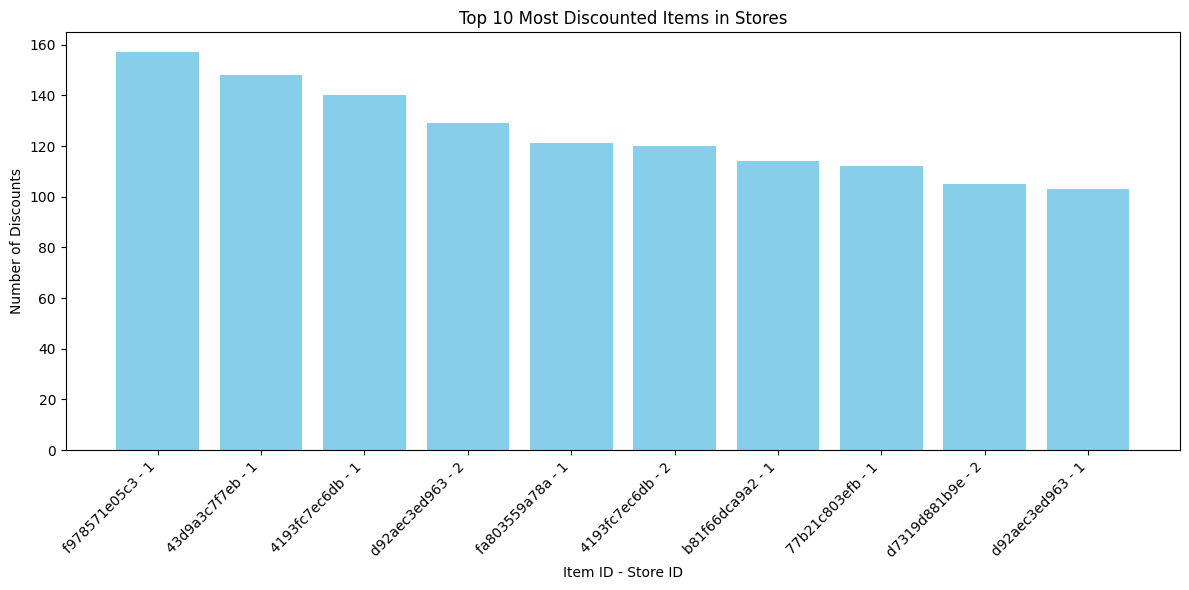

In [188]:

# Count the number of discounts per item per store
discount_counts = df_merged.groupby(['item_id', 'store_id']).size().reset_index(name='discount_count')

# Sort the result to get the most discounted items
most_discounted = discount_counts.sort_values(by='discount_count', ascending=False).head(10)

# Create a bar plot for the most discounted items across stores
plt.figure(figsize=(12, 6))
bars = plt.bar(most_discounted['item_id'] + ' - ' + most_discounted['store_id'].astype(str),
               most_discounted['discount_count'],
               color='skyblue')

plt.xlabel('Item ID - Store ID')
plt.ylabel('Number of Discounts')
plt.title('Top 10 Most Discounted Items in Stores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


* The bar chart you've provided shows the Top 10 Most Discounted Items in Stores based on the number of discounts they received. The x-axis represents different item_id and store_id combinations (e.g., "f978571e05c3-1", "43d9a3c77feb-1"), while the y-axis represents the total number of discounts (number_disc_day) for each item-store combination.
* The chart shows that some items (like "f978571e05c3-1") have been discounted more frequently than others, indicating they were likely subject to more promotional activity or were on sale more often in the respective stores. This visualization helps in identifying which items are most frequently discounted across various stores. 


### **5.2:** How do prices of items (price) vary across time (date)?


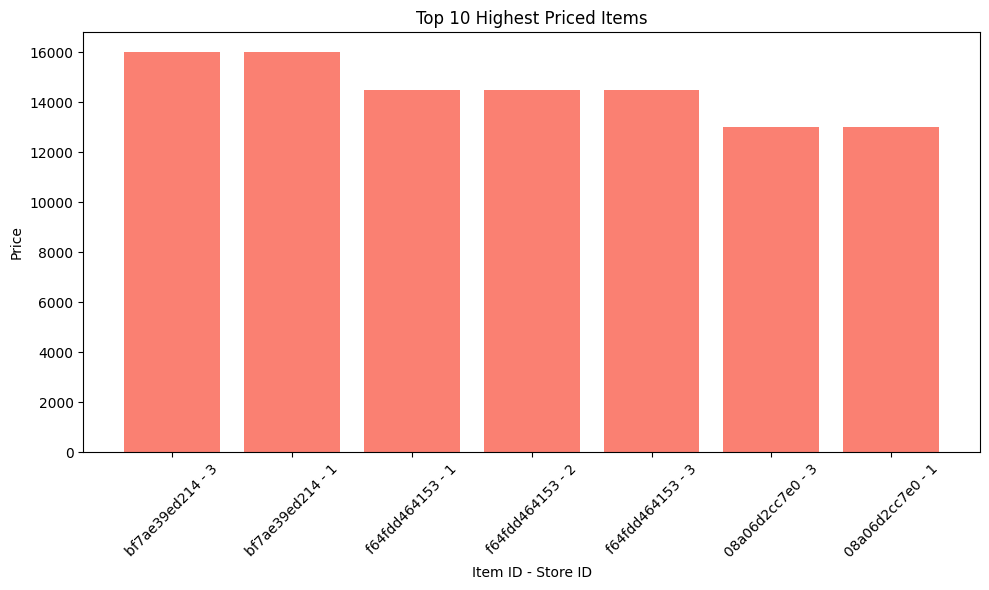

In [189]:
import matplotlib.pyplot as plt

# Sort the dataset by price in descending order
sorted_price = df_merged.sort_values(by='price', ascending=False)

# Get top 10 highest priced items
top_10_highest = sorted_price.head(10)  # First 10 rows are the highest-priced items

# Plotting the highest priced items
plt.figure(figsize=(10, 6))
plt.bar(top_10_highest['item_id'] + ' - ' + top_10_highest['store_id'].astype(str),
        top_10_highest['price'],
        color='salmon')

plt.title('Top 10 Highest Priced Items')
plt.xlabel('Item ID - Store ID')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


* This bar chart illustrates the Top 10 Highest Priced Items in the dataset. The x-axis represents various combinations of item_id and store_id (e.g., "bf7ae39ed214-3", "f64fdd464153-1"), and the y-axis represents the price of the items.

* The chart shows that certain items, such as "bf7ae39ed214-1" and "f64fdd464153-1," have the highest prices compared to other items, with prices exceeding 10,000. This visualization highlights which specific item-store combinations have the most expensive items, offering insights into high-priced inventory across different stores.




### **5.2:** Reflection
If I had more time, I would focus on investigating any potential issues with missing or duplicated data in both datasets to ensure the results are more accurate. I would also explore other research questions, such as analyzing the relationship between item categories and discount frequency, and how promotions affect sales performance over time. Additionally, I would consider examining how store-specific trends influence the effectiveness of discounts.


